In [1]:
import tkinter as tk
import os
import time
#import numpy as np
#from PIL import Image, ImageTk
#from numpy.fft import fftshift
from matplotlib.image import imread
import matplotlib.pyplot as plt

import cmath

import matplotlib
import matplotlib.backends.backend_agg as agg


WIDTH, HEIGHT = 1000,562
SAMPLINGRATE = 128
AMOUNT = 2
ImageSize = 256
root = tk.Tk()
root.minsize(WIDTH, HEIGHT)
root.title("EERI 414 Practical:  IIR Digital high-pass filter")
BG = tk.PhotoImage(file = os.path.join("Images", "background.png"))
lblBG = tk.Label(root, image = BG)
lblBG.place(x = 0, y = 0)
root.configure(background = "navy")

def btnGenerateClick():
    pass

def btnAnalogClick():
    pass


def btnDigitalClick():
    pass


def btnRealizeClick():
    pass


def btnCompareClick():
    pass



       
btngenerate = tk.Button(root, text = "Generate signal",command=btnGenerateClick)
btngenerate.place(x=WIDTH*0.2,y=HEIGHT*0.1)

btnAnalog = tk.Button(root, text = "Analog domain",command=btnAnalogClick)
btnAnalog.place(x=WIDTH*0.2,y=HEIGHT*0.2)

btnDigital = tk.Button(root, text = "Digital domain",command=btnDigitalClick)
btnDigital.place(x=WIDTH*0.2,y=HEIGHT*0.3)

btnRealize = tk.Button(root, text = "Realize filter",command=btnRealizeClick)
btnRealize.place(x=WIDTH*0.2,y=HEIGHT*0.4)

btnCompare = tk.Button(root, text = "Input vs output of filter",command=btnCompareClick)
btnCompare.place(x=WIDTH*0.2,y=HEIGHT*0.5)



root.mainloop()


In [37]:
from sympy import symbols
from sympy import tan, acosh, sqrt, ceiling
from sympy.interactive import printing
printing.init_printing(use_latex = True)
import math

import matplotlib.pyplot as plt

In [52]:
FT = 200000 #Hz
FP = 85000 #Hz
FS = 45000 #Hz
AMAX = 0.25 #dB
AMIN = 40 #dB
PI = 3.141592653589792328462643383279502

Ft, Fp, Fs, Amax, Amin, s = symbols('Ft Fp Fs Amax Amin s')


#Convert to radians per seconds:
Wp, Ws = symbols('Wp Ws')

Wp = (2*PI*Fp)/Ft
Ws = (2*PI*Fs)/Ft

display("Wp:", Wp, "Ws:", Ws)



'Wp:'

c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local

'Ws:'

In [47]:
Wp = -1
Ws = -0.5294

'Omegap:'

'Omegas:'

'n:'

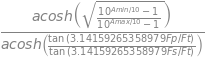

In [54]:

#Pre-warp/normalise to Low Pass
Omegap, Omegas = symbols('Omegap Omegas')

Omegas = tan(Wp/2)
Omegap = tan(Ws/2)

display("Omegap:", Omegap, "Omegas:", Omegas)


#Find order of filter

n = (acosh(sqrt((10**(Amin/10)-1)/(10**(Amax/10)-1))))/(acosh(Omegas/Omegap))

display("n:", n)

nAnswer = n.subs([(Amax, AMAX), (Amin, AMIN), (Ft, FT), (Fp, FP), (Fs, FS)])

display(nAnswer.evalf())
display(ceiling(nAnswer.evalf()))



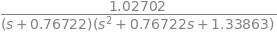

'Hhps'

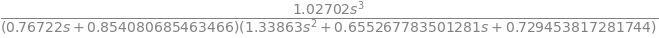

In [67]:
Hlps = symbols('Hlps')

#Hlps = (s*s + 0.27005*s + 1.09543)(s*s + 0.707*s + 0.53642)(s + 0.43695) n=5
Hlps = (1.02702)/((s*s + 0.76722*s + 1.33863)* (s + 0.76722))  #n=3
display(Hlps)

Hhps = symbols('Hhps')
Hhps = Hlps.subs([(s, Omegap/s), (Fs, FS), (Ft, FT)])
display("Hhps:", Hhps.simplify())
